In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
df_burn = pd.read_csv('../data/burn_log.csv', index_col=0)
df_mint = pd.read_csv('../data/mint_log.csv', index_col=0)
df_swap = pd.read_csv('../data/swap_log.csv', index_col=0)

In [44]:
def create_merge_df(df_swap, df_mint, df_burn):
    df_burn = df_burn.copy()
    df_burn = df_burn[['version','amount_x','amount_y']]
    df_burn[['amount_x','amount_y']] = (-1) * df_burn[['amount_x','amount_y']]
    df_burn['function'] = 'burn'

    df_mint = df_mint.copy()
    df_mint = df_mint[['version','amount_x','amount_y']]
    df_mint['function'] = 'mint'

    df_swap = df_swap.copy()
    df_swap['amount_x'] = df_swap['amount_x_in'] - df_swap['amount_x_out']
    df_swap['amount_y'] = df_swap['amount_y_in'] - df_swap['amount_y_out']
    df_swap = df_swap[['version','amount_x','amount_y']]
    df_swap['function'] = 'swap'

    df = pd.concat([df_swap, df_mint])
    df = pd.concat([df, df_burn])
    df = df.sort_values('version')
    df[['reserve_x','reserve_y']] = df[['amount_x','amount_y']].cumsum()
    df = df.reset_index(drop=True)

    return df
    

df = create_merge_df(df_swap, df_mint, df_burn)


In [60]:
def get_amount_out(df):
    df = df.copy()
    amount_in = 1 * (10 ** 8)
    usdc_price = []
    for idx, items in tqdm(df.iterrows()):
        price = (997 * int(items['reserve_y']) * amount_in) / ((int(items['reserve_x']) * 1000) + (amount_in * 997))
        usdc_price.append(price)
    df['usdc_price'] = usdc_price
    return df

df = get_amount_out(df)

893359it [00:32, 27789.63it/s]


In [64]:
df['version'].tail(10000)

883359    251637124
883360    251637139
883361    251637192
883362    251637272
883363    251637469
            ...    
893354    252870165
893355    252870505
893356    252870555
893357    252870973
893358    252871019
Name: version, Length: 10000, dtype: int64

<AxesSubplot: >

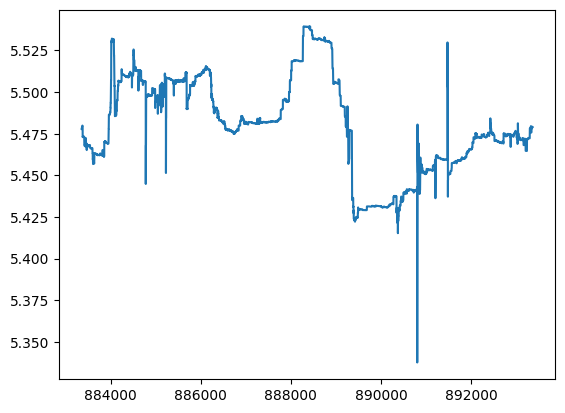

In [63]:
(df['usdc_price']/10**6).tail(10000).plot()

<AxesSubplot: >

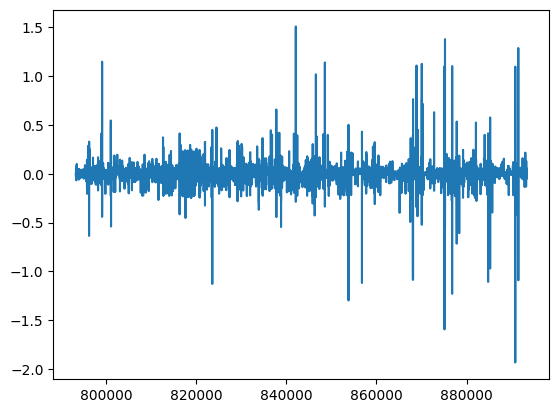

In [67]:
(df['usdc_price'].pct_change() * 100).tail(10000*10).plot()